In [1]:
import yfinance as yf

In [2]:
s_p=['AAPL','MSFT','CAT']

In [3]:
df=yf.download(s_p,start='2020-01-01')['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [4]:
ret_df=df.pct_change()
ret_df

,AAPL,CAT,MSFT
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.009722,-0.013884,-0.012452
2020-01-06,0.007968,-0.000674,0.002585
2020-01-07,-0.004703,-0.013213,-0.009118
2020-01-08,0.016086,0.008881,0.015929
...,...,...,...
2024-06-18,-0.010984,0.008499,-0.004528
2024-06-20,-0.021513,0.012272,-0.001434
2024-06-21,-0.010444,-0.003919,0.009154


In [5]:
ret_df.corr()

,AAPL,CAT,MSFT
AAPL,1.000000,0.359989,0.756563
CAT,0.359989,1.000000,0.356030
MSFT,0.756563,0.356030,1.000000


In [6]:
roll_corr=ret_df.rolling(90).corr()
roll_corr

AAPL       CAT      MSFT
Date                                         
2020-01-02 AAPL       NaN       NaN       NaN
           CAT        NaN       NaN       NaN
           MSFT       NaN       NaN       NaN
2020-01-03 AAPL       NaN       NaN       NaN
           CAT        NaN       NaN       NaN
...                   ...       ...       ...
2024-06-24 CAT   0.080100  1.000000  0.416914
           MSFT  0.343066  0.416914  1.000000
2024-06-25 AAPL  1.000000  0.082545  0.347849
           CAT   0.082545  1.000000  0.408669
           MSFT  0.347849  0.408669  1.000000

[3381 rows x 3 columns]

In [8]:
roll_corr.dropna(inplace=True)
roll_corr#correlation matrix for past 90 days

AAPL       CAT      MSFT
Date                                         
2020-05-12 AAPL  1.000000  0.750054  0.931520
           CAT   0.750054  1.000000  0.740369
           MSFT  0.931520  0.740369  1.000000
2020-05-13 AAPL  1.000000  0.749493  0.931550
           CAT   0.749493  1.000000  0.739509
...                   ...       ...       ...
2024-06-24 CAT   0.080100  1.000000  0.416914
           MSFT  0.343066  0.416914  1.000000
2024-06-25 AAPL  1.000000  0.082545  0.347849
           CAT   0.082545  1.000000  0.408669
           MSFT  0.347849  0.408669  1.000000

[3111 rows x 3 columns]

<Axes: xlabel='Date'>

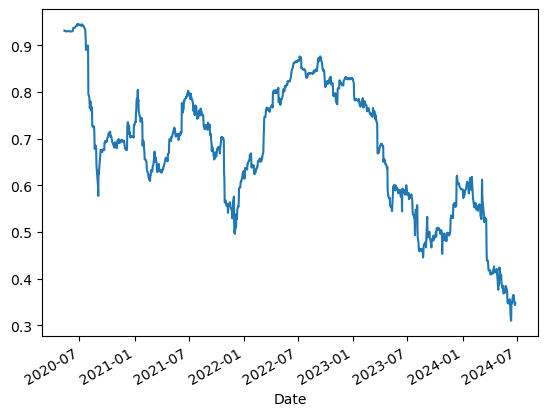

In [10]:
roll_corr['AAPL'].loc[:,'MSFT'].plot()

In [11]:
roll_corr.unstack()

AAPL                           CAT                     MSFT  \
           AAPL       CAT      MSFT      AAPL  CAT      MSFT      AAPL   
Date                                                                     
2020-05-12  1.0  0.750054  0.931520  0.750054  1.0  0.740369  0.931520   
2020-05-13  1.0  0.749493  0.931550  0.749493  1.0  0.739509  0.931550   
2020-05-14  1.0  0.749091  0.931675  0.749091  1.0  0.738711  0.931675   
2020-05-15  1.0  0.746749  0.930399  0.746749  1.0  0.738776  0.930399   
2020-05-18  1.0  0.743354  0.929514  0.743354  1.0  0.728611  0.929514   
...         ...       ...       ...       ...  ...       ...       ...   
2024-06-18  1.0  0.096129  0.364713  0.096129  1.0  0.413540  0.364713   
2024-06-20  1.0  0.084882  0.364248  0.084882  1.0  0.429609  0.364248   
2024-06-21  1.0  0.093833  0.352357  0.093833  1.0  0.441965  0.352357   
2024-06-24  1.0  0.080100  0.343066  0.080100  1.0  0.416914  0.343066   
2024-06-25  1.0  0.082545  0.347849  0.082545  1.0  0.408669  0.347849   

                           
                 CAT MSFT  
Date                       
2020-05-12  0.740369  1.0  
2020-05-13  0.739509  1.0  
2020-05-14  0.738711  1.0  
2020-05-15  0.738776  1.0  
2020-05-18  0.728611  1.0  
...              ...  ...  
2024-06-18  0.413540  1.0  
2024-06-20  0.429609  1.0  
2024-06-21  0.441965  1.0  
2024-06-24  0.416914  1.0  
2024-06-25  0.408669  1.0  

[1037 rows x 9 columns]

In [14]:
roll_corr.unstack()['AAPL']

,AAPL,CAT,MSFT
Date,,,
2020-05-12,1.0,0.750054,0.931520
2020-05-13,1.0,0.749493,0.931550
2020-05-14,1.0,0.749091,0.931675
2020-05-15,1.0,0.746749,0.930399
2020-05-18,1.0,0.743354,0.929514
...,...,...,...
2024-06-18,1.0,0.096129,0.364713
2024-06-20,1.0,0.084882,0.364248
2024-06-21,1.0,0.093833,0.352357


In [12]:
roll_corr.unstack()['AAPL'][['MSFT','CAT']]

,MSFT,CAT
Date,,
2020-05-12,0.931520,0.750054
2020-05-13,0.931550,0.749493
2020-05-14,0.931675,0.749091
2020-05-15,0.930399,0.746749
2020-05-18,0.929514,0.743354
...,...,...
2024-06-18,0.364713,0.096129
2024-06-20,0.364248,0.084882
2024-06-21,0.352357,0.093833


<Axes: xlabel='Date'>

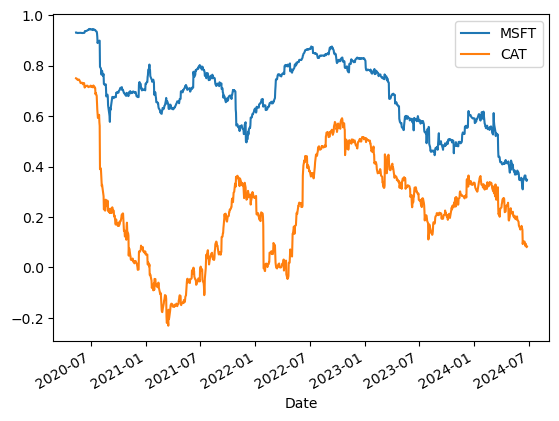

In [13]:
roll_corr.unstack()['AAPL'][['MSFT','CAT']].plot()